In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline



In [2]:
from bike_workflow.data import get_data

In [3]:
data = get_data()

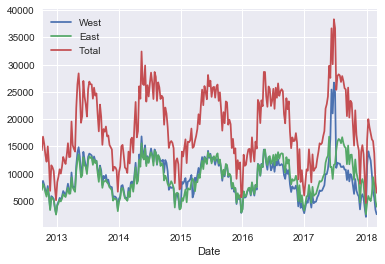

In [4]:

data.resample('W').sum().plot()

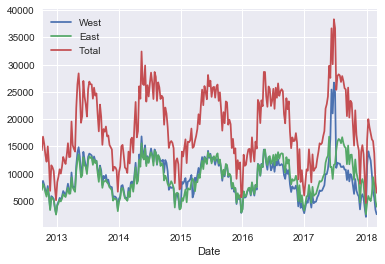

In [5]:

data.resample('W').sum().plot()

/Users/moe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 45194.656612318831)

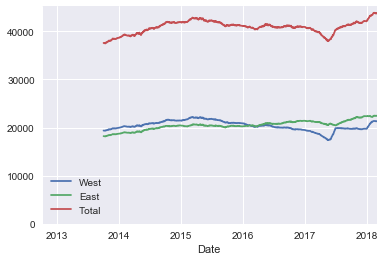

In [6]:


ax = data.resample('D').rolling(365).sum().plot()
ax.set_ylim(0, None)

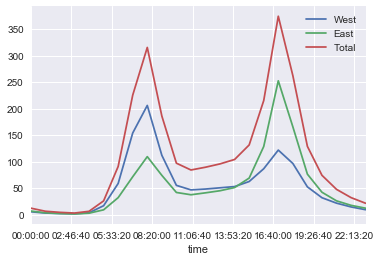

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


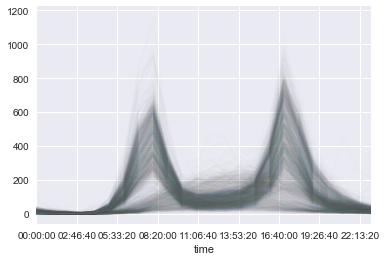

In [9]:
pivoted.plot(legend=False, alpha=0.01)

In [10]:
X = pivoted.fillna(0).T.values
X.shape

(1975, 24)

In [11]:
from sklearn.decomposition import PCA as pca
X2 = pca(2, svd_solver='full').fit_transform(X)

In [12]:
X2.shape

(1975, 2)

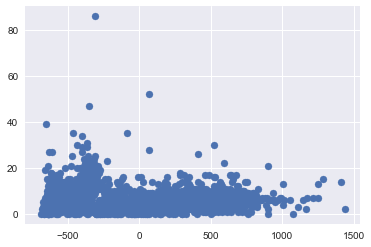

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X2[:, 0], X[:, 1])

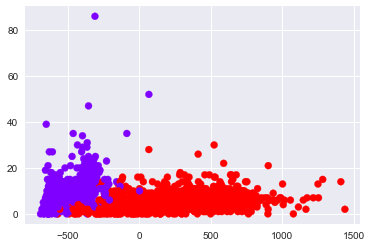

In [18]:
from sklearn.mixture import GaussianMixture as gmm

gmmfit = gmm(2)
gmmfit.fit(X)
labels = gmmfit.predict(X)
labels

plt.scatter(X2[:, 0], X[:, 1], c=labels, cmap='rainbow')

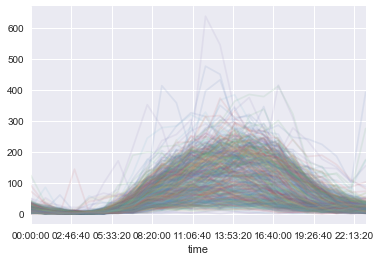

In [22]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1)

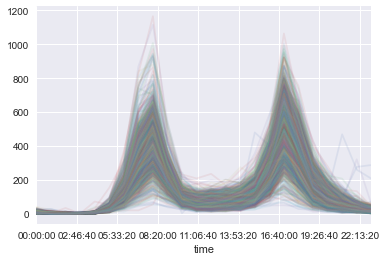

In [23]:
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1)

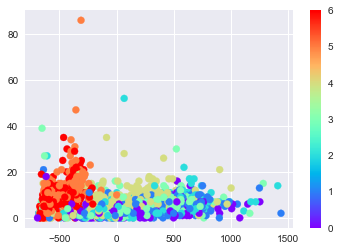

In [29]:
import pandas as pd
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X[:, 1], c=dayofweek, cmap='rainbow')

plt.colorbar()

In [30]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-02-15', '2018-02-16', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28'],
              dtype='datetime64[ns]', length=1362, freq=None)